In [1]:
!pip install pycaret==2.3.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 318 kB 7.8 MB/s 
     |████████████████████████████████| 17.8 MB 691 kB/s 
     |████████████████████████████████| 88 kB 8.9 MB/s 
     |████████████████████████████████| 120 kB 61.8 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 1.7 MB 48.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 262 kB 67.5 MB/s 
     |████████████████████████████████| 167 kB 77.3 MB/s 
     |████████████████████████████████| 6.8 MB 52.5 MB/s 
     |████████████████████████████████| 2.0 MB 48.5 MB/s 
     |████████████████████████████████| 1.3 MB 56.6 MB/s 
     |████████████████████████████████| 1.3 MB 50.5 MB/s 
     |████████████████████████████████| 1

In [1]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import pandas as pd
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
dataset = pd.read_csv("/content/members_v01_sample_joinfinal_afterfeatures.csv")
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.shape

(3058, 22)

In [3]:
dataset.head()

,msno,city,bd,gender,registered_via,total_transactions,total_activity,time_on_platform_months,is_churn,num_25,...,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
0,aQVBU/xPPqCLe7Rmrm+RaA+CtUw/mh11BC64ywPU/4s=,13,39,female,9,1.0,3.0,137,0,1.333333,...,1.666667,46.666667,35.000000,7390.130333,33.0,30.0,149.0,149.0,1.0,0.0
1,qm8Y9UZlujM4gwXk0BTCePunrxgxqErMXl/n5neevpk=,4,36,female,9,1.0,24.0,134,0,2.125000,...,0.416667,15.750000,18.250000,4061.292333,37.0,30.0,149.0,149.0,1.0,0.0
2,WoPj+C4fN+bSeYWORLlScDdB8F71BcyvBWHW+hZIE0s=,6,27,female,3,1.0,26.0,37,0,9.961538,...,1.461538,79.576923,47.038462,19032.808308,40.0,30.0,149.0,149.0,1.0,0.0
3,X6jT/KVJ2SSMeCQIm3JmWxm0SdR3c6jalh9wflF8WS4=,6,24,male,3,1.0,28.0,34,1,14.107143,...,1.500000,28.214286,44.785714,8085.698250,32.0,195.0,894.0,894.0,0.0,0.0
4,tF+18ft13i1F+4+6V43naK8LjlDdShBhgaP+r7SZ59Q=,13,38,female,9,2.0,22.0,21,0,2.181818,...,0.409091,13.545455,14.727273,3346.993091,39.0,30.0,149.0,149.0,1.0,0.0


In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2905, 22)
Unseen Data For Predictions: (153, 22)


In [14]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'is_churn',  fold_shuffle=True, 
                   session_id=3,ignore_features=['msno'],
                   normalize=True,remove_multicollinearity=True,
                fix_imbalance=True,n_jobs=-1,use_gpu=True,
                   log_experiment=True,experiment_name='advance_baseline_try2',
                   log_plots=True, log_data=True,
                   silent=True, verbose=True)
                  #  ,profile=True) 

,Description,Value
0,session_id,3
1,Target,is_churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2905, 22)"
5,Missing Values,False
6,Numeric Features,18
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


2022/06/01 11:31:00 INFO mlflow.tracking.fluent: Experiment with name 'advance_baseline_try2' does not exist. Creating a new experiment.


In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9567,0.9068,0.6755,0.8128,0.7318,0.7086,0.7155,0.269
gbc,Gradient Boosting Classifier,0.9557,0.9140,0.6752,0.7970,0.7241,0.7004,0.7071,1.131
et,Extra Trees Classifier,0.9542,0.9049,0.5895,0.8362,0.6842,0.6607,0.6762,0.989
rf,Random Forest Classifier,0.9503,0.9100,0.6239,0.7646,0.6834,0.6569,0.6629,1.168
ada,Ada Boost Classifier,0.9488,0.8664,0.6690,0.7355,0.6952,0.6676,0.6715,0.323
dt,Decision Tree Classifier,0.9257,0.8001,0.6480,0.5883,0.6063,0.5662,0.5728,0.044
dummy,Dummy Classifier,0.9134,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014
lr,Logistic Regression,0.8898,0.9057,0.7716,0.4395,0.5547,0.4988,0.5273,0.082
knn,K Neighbors Classifier,0.8692,0.8568,0.7092,0.3665,0.4816,0.4153,0.4463,0.185
ridge,Ridge Classifier,0.8559,0.0000,0.7843,0.3601,0.4911,0.4219,0.4661,0.063


In [16]:
lgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.9657  0.9301  0.6111  1.0000  0.7586  0.7413  0.7674
       1       0.9706  0.9731  0.7778  0.8750  0.8235  0.8075  0.8092
       2       0.9657  0.8731  0.7222  0.8667  0.7879  0.7694  0.7732
       3       0.9458  0.8884  0.7059  0.6667  0.6857  0.6561  0.6564
       4       0.9606  0.9320  0.5882  0.9091  0.7143  0.6942  0.7132
       5       0.9655  0.9032  0.7059  0.8571  0.7742  0.7557  0.7599
       6       0.9507  0.8675  0.5882  0.7692  0.6667  0.6406  0.6473
       7       0.9261  0.9024  0.6667  0.5714  0.6154  0.5748  0.5769
       8       0.9606  0.9553  0.7222  0.8125  0.7647  0.7433  0.7448
       9       0.9557  0.8432  0.6667  0.8000  0.7273  0.7034  0.7068
       Mean    0.9567  0.9068  0.6755  0.8128  0.7318  0.7086  0.7155
       Std     0.0125  0.0388  0.0602  0.1161  0.0595  0.0660  0.0671
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

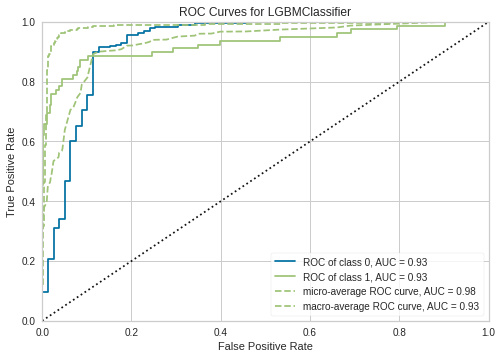

In [17]:
plot_model(lgbm, plot = 'auc')

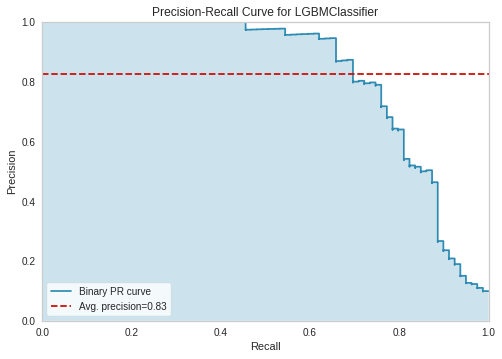

In [18]:
plot_model(lgbm, plot = 'pr')

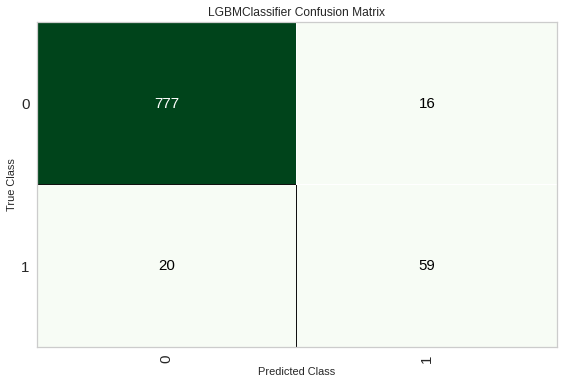

In [19]:
plot_model(lgbm, plot = 'confusion_matrix')

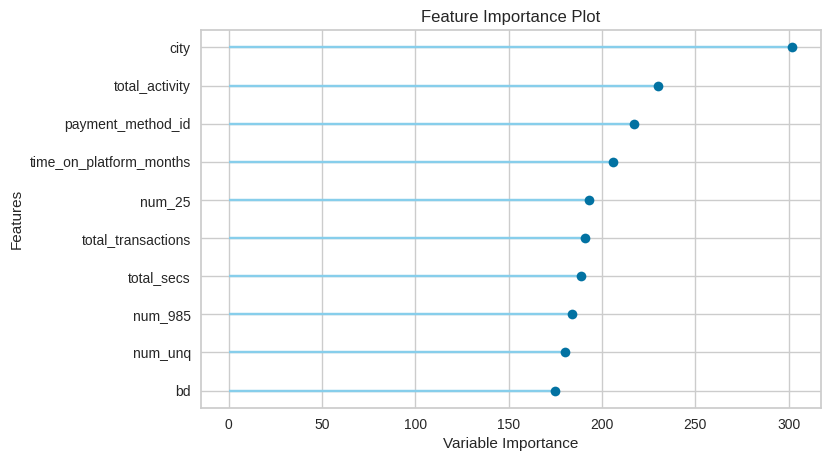

In [20]:
plot_model(lgbm, plot='feature')

In [21]:
predict_model(lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9587,0.9281,0.7468,0.7867,0.7662,0.7436,0.7439


## Modeling

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
dataset.head()

,msno,city,bd,gender,registered_via,total_transactions,total_activity,time_on_platform_months,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
0,aQVBU/xPPqCLe7Rmrm+RaA+CtUw/mh11BC64ywPU/4s=,13,39,female,9,1.0,3.0,137,0,1.333333,0.666667,0.000000,1.666667,46.666667,35.000000,7390.130333,33.0,30.0,149.0,149.0,1.0,0.0
1,qm8Y9UZlujM4gwXk0BTCePunrxgxqErMXl/n5neevpk=,4,36,female,9,1.0,24.0,134,0,2.125000,0.666667,0.375000,0.416667,15.750000,18.250000,4061.292333,37.0,30.0,149.0,149.0,1.0,0.0
2,WoPj+C4fN+bSeYWORLlScDdB8F71BcyvBWHW+hZIE0s=,6,27,female,3,1.0,26.0,37,0,9.961538,2.307692,2.153846,1.461538,79.576923,47.038462,19032.808308,40.0,30.0,149.0,149.0,1.0,0.0
3,X6jT/KVJ2SSMeCQIm3JmWxm0SdR3c6jalh9wflF8WS4=,6,24,male,3,1.0,28.0,34,1,14.107143,3.357143,2.178571,1.500000,28.214286,44.785714,8085.698250,32.0,195.0,894.0,894.0,0.0,0.0
4,tF+18ft13i1F+4+6V43naK8LjlDdShBhgaP+r7SZ59Q=,13,38,female,9,2.0,22.0,21,0,2.181818,0.909091,0.590909,0.409091,13.545455,14.727273,3346.993091,39.0,30.0,149.0,149.0,1.0,0.0


In [25]:
dataset['gender'] = dataset['gender'].map({'female':1,'male':0})

In [26]:
dataset.head()

,msno,city,bd,gender,registered_via,total_transactions,total_activity,time_on_platform_months,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
0,aQVBU/xPPqCLe7Rmrm+RaA+CtUw/mh11BC64ywPU/4s=,13,39,1,9,1.0,3.0,137,0,1.333333,0.666667,0.000000,1.666667,46.666667,35.000000,7390.130333,33.0,30.0,149.0,149.0,1.0,0.0
1,qm8Y9UZlujM4gwXk0BTCePunrxgxqErMXl/n5neevpk=,4,36,1,9,1.0,24.0,134,0,2.125000,0.666667,0.375000,0.416667,15.750000,18.250000,4061.292333,37.0,30.0,149.0,149.0,1.0,0.0
2,WoPj+C4fN+bSeYWORLlScDdB8F71BcyvBWHW+hZIE0s=,6,27,1,3,1.0,26.0,37,0,9.961538,2.307692,2.153846,1.461538,79.576923,47.038462,19032.808308,40.0,30.0,149.0,149.0,1.0,0.0
3,X6jT/KVJ2SSMeCQIm3JmWxm0SdR3c6jalh9wflF8WS4=,6,24,0,3,1.0,28.0,34,1,14.107143,3.357143,2.178571,1.500000,28.214286,44.785714,8085.698250,32.0,195.0,894.0,894.0,0.0,0.0
4,tF+18ft13i1F+4+6V43naK8LjlDdShBhgaP+r7SZ59Q=,13,38,1,9,2.0,22.0,21,0,2.181818,0.909091,0.590909,0.409091,13.545455,14.727273,3346.993091,39.0,30.0,149.0,149.0,1.0,0.0


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_subset_v01 = dataset.drop(['msno','is_churn'],axis=1)
scaler.fit(dataset_subset_v01)
dataset_scaled = pd.DataFrame(scaler.transform(dataset_subset_v01),columns = dataset_subset_v01.columns)
dataset_scaled_final = pd.concat([dataset_scaled,dataset[['msno','is_churn']]],axis=1)

In [45]:
dataset_scaled_final.head()

,city,bd,gender,registered_via,total_transactions,total_activity,time_on_platform_months,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,msno,is_churn
0,0.371400,0.993125,1.047566,0.857936,-0.290372,-1.845784,1.869794,-0.589591,-0.400968,-0.939641,0.460970,0.528473,0.329657,-0.037045,-0.938720,-0.166974,-0.155846,-0.152153,0.441515,-0.158461,aQVBU/xPPqCLe7Rmrm+RaA+CtUw/mh11BC64ywPU/4s=,0
1,-1.149456,0.697181,1.047566,0.857936,-0.290372,0.444169,1.796248,-0.483188,-0.400968,-0.535548,-0.382861,-0.427661,-0.425430,-0.475946,-0.012780,-0.166974,-0.155846,-0.152153,0.441515,-0.158461,qm8Y9UZlujM4gwXk0BTCePunrxgxqErMXl/n5neevpk=,0
2,-0.811488,-0.190650,1.047566,-1.525681,-0.290372,0.662260,-0.581738,0.570076,0.479306,1.381303,0.322495,1.546261,0.872348,1.498018,0.681674,-0.166974,-0.155846,-0.152153,0.441515,-0.158461,WoPj+C4fN+bSeYWORLlScDdB8F71BcyvBWHW+hZIE0s=,0
3,-0.811488,-0.486594,-0.954594,-1.525681,-0.290372,0.880351,-0.655284,1.127263,1.042249,1.407947,0.348459,-0.042189,0.770795,0.054664,-1.170204,3.307863,3.587939,3.586921,-2.280426,-0.158461,X6jT/KVJ2SSMeCQIm3JmWxm0SdR3c6jalh9wflF8WS4=,1
4,0.371400,0.894477,1.047566,0.857936,0.757984,0.226078,-0.973983,-0.475551,-0.270927,-0.302889,-0.387975,-0.495839,-0.584234,-0.570124,0.450189,-0.166974,-0.155846,-0.152153,0.441515,-0.158461,tF+18ft13i1F+4+6V43naK8LjlDdShBhgaP+r7SZ59Q=,0


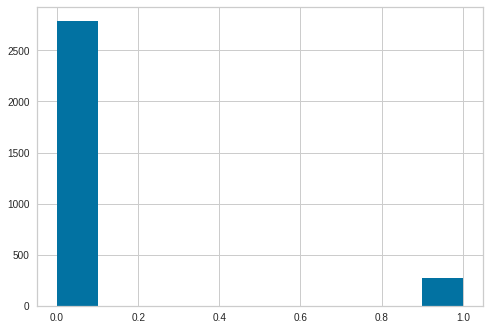

In [44]:
dataset_scaled_final['is_churn'].hist()

In [50]:
dataset_scaled_final_withoutmsno = dataset_scaled_final.drop('msno',axis=1)

In [52]:
X = np.array(dataset_scaled_final_withoutmsno.iloc[:, dataset_scaled_final_withoutmsno.columns != 'is_churn'])
y = np.array(dataset_scaled_final_withoutmsno.iloc[:, dataset_scaled_final_withoutmsno.columns == 'is_churn'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (3058, 20)
Shape of y: (3058, 1)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2446, 20)
Number transactions y_train dataset:  (2446, 1)
Number transactions X_test dataset:  (612, 20)
Number transactions y_test dataset:  (612, 1)


In [54]:
from imblearn.over_sampling import SMOTE # SMOTE synthatically generates that data from a given distribution # this library only works with numerical 
#continous data. For other dta type use different version of SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [229]
Before OverSampling, counts of label '0': [2217] 

After OverSampling, the shape of train_X: (4434, 20)
After OverSampling, the shape of train_y: (4434,) 

After OverSampling, counts of label '1': 2217
After OverSampling, counts of label '0': 2217


In [55]:
%%time
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       570
           1       0.86      0.60      0.70        42

    accuracy                           0.97       612
   macro avg       0.92      0.79      0.84       612
weighted avg       0.96      0.97      0.96       612

CPU times: user 53.1 ms, sys: 55.2 ms, total: 108 ms
Wall time: 128 ms


In [56]:
%%time
model2 = linear_model.LogisticRegression()
model2.fit(X_train_res,y_train_res)
predict2 = model2.predict(X_test)
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       570
           1       0.39      0.83      0.53        42

    accuracy                           0.90       612
   macro avg       0.69      0.87      0.74       612
weighted avg       0.95      0.90      0.91       612

CPU times: user 109 ms, sys: 78.7 ms, total: 188 ms
Wall time: 174 ms


In [57]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Base Model ---> Model without any parameter 
model = RandomForestClassifier(random_state= 101).fit(X_train,y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))

[[565   5]
 [ 14  28]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       570
           1       0.85      0.67      0.75        42

    accuracy                           0.97       612
   macro avg       0.91      0.83      0.87       612
weighted avg       0.97      0.97      0.97       612

0.9689542483660131


In [58]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Base Model ---> Model without any parameter 
model = DecisionTreeClassifier(random_state=102).fit(X_train,y_train)
predictiondtree = model.predict(X_test)
print(confusion_matrix(y_test,predictiondtree))
print(classification_report(y_test,predictiondtree))
print(accuracy_score(y_test,predictiondtree))

[[553  17]
 [ 12  30]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       570
           1       0.64      0.71      0.67        42

    accuracy                           0.95       612
   macro avg       0.81      0.84      0.82       612
weighted avg       0.96      0.95      0.95       612

0.9526143790849673


In [62]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [5,10,20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 1116 tasks      | elapsed:   39.4s


[[568   2]
 [ 16  26]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       570
           1       0.93      0.62      0.74        42

    accuracy                           0.97       612
   macro avg       0.95      0.81      0.86       612
weighted avg       0.97      0.97      0.97       612



[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   45.1s finished


In [63]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [10,20,50],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [10,15,20],
               'n_estimators': [5,10,20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)
print(model.best_estimator_)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:   57.0s


[[566   4]
 [ 17  25]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       570
           1       0.86      0.60      0.70        42

    accuracy                           0.97       612
   macro avg       0.92      0.79      0.84       612
weighted avg       0.96      0.97      0.96       612

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   57.4s finished


In [60]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [5,10,20,100]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_grid_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1,scoring="precision",return_train_score=True)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
# acc3 = accuracy_score(y_test,predictionforest)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[[570   0]
 [ 22  20]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       1.00      0.48      0.65        42

    accuracy                           0.96       612
   macro avg       0.98      0.74      0.81       612
weighted avg       0.97      0.96      0.96       612



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.3s finished


In [61]:
random_grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
              }

clf = DecisionTreeClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_grid_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[[563   7]
 [ 18  24]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       570
           1       0.77      0.57      0.66        42

    accuracy                           0.96       612
   macro avg       0.87      0.78      0.82       612
weighted avg       0.96      0.96      0.96       612



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [67]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(X, y)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[570   0]
 [  0  42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       570
           1       1.00      1.00      1.00        42

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [68]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10,50,100],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [5,10,20,50,100]}

In [74]:
# 64GB Ram Machines which are high core (more than 16) ~ more than 3L records 
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 50, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50])
    }

# hp.choice -> For categories 
# hp.quniform -> for interger values 
# hp.uniform -> for float values 

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train,y_train, cv = 5, scoring="precision").mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 50,
            trials= trials)
best

100%|██████████| 50/50 [00:23<00:00,  2.12it/s, best loss: -0.9826086956521738]


{'criterion': 1,
 'max_depth': 10.0,
 'max_features': 1,
 'min_samples_leaf': 0.017032103013404756,
 'min_samples_split': 0.1790018873521247,
 'n_estimators': 0}

In [75]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 75, 3: 100, 4: 125}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[570   0]
 [ 22  20]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       1.00      0.48      0.65        42

    accuracy                           0.96       612
   macro avg       0.98      0.74      0.81       612
weighted avg       0.97      0.96      0.96       612



In [77]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 7.9 MB/s 
     |████████████████████████████████| 81 kB 7.9 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 112 kB 47.1 MB/s 
     |████████████████████████████████| 146 kB 54.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=c1fc235c1d87b3bbf9fcd703b7b882a5f4ccc17c3eb0e5b8b772fd784f05c272
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [78]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
import optuna

#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2022-06-01 12:08:30,876] A new study created in memory with name: no-name-b60c4b57-ce7c-40bb-b837-949f238150c6
[I 2022-06-01 12:08:46,102] Trial 0 finished with value: 0.9591253118846493 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 789, 'rf_max_depth': 18}. Best is trial 0 with value: 0.9591253118846493.
[I 2022-06-01 12:08:59,990] Trial 1 finished with value: 0.9594521092702702 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 791, 'rf_max_depth': 22}. Best is trial 1 with value: 0.9594521092702702.
[I 2022-06-01 12:09:00,075] Trial 2 finished with value: 0.9362324975786848 and parameters: {'classifier': 'LogReg', 'logreg_c': 0.00407766672093527}. Best is trial 1 with value: 0.9594521092702702.
[I 2022-06-01 12:09:00,137] Trial 3 finished with value: 0.9113801817750325 and parameters: {'classifier': 'LogReg', 'logreg_c': 3.732172614809147e-09}. Best is trial 1 with value: 0.9594521092702702.
[I 2022-06-01 12:09:00,403] Trial 4 finished with valu